In [1]:
import pandas as pd
import numpy as np
import gower
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    return df

df = wrangle('QVI_data.csv')
df.head(10)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium
9,1010,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream


#### Let's find out if the dataset is clean

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


#### There are no null values in any of the columns but we'll need to handle the datatypes of some columns and change all the column names to lower case

In [4]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [5]:
# Change the name of LYLTY_CARD_NBR column
df = df.rename(columns={'lylty_card_nbr': 'loyalty_card_num'})

In [6]:
# change datatype of the date column
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
# change loyalty_card_num, store_nbr and txn_id to string
df['loyalty_card_num'] = df['loyalty_card_num'].astype(str)
df['store_nbr'] = df['store_nbr'].astype(str)
df['txn_id'] = df['txn_id'].astype(str)
df['prod_nbr'] = df['prod_nbr'].astype(str)

In [8]:
# extract day from date
df['day'] = df['date'].dt.day_name()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   loyalty_card_num  264834 non-null  object        
 1   date              264834 non-null  datetime64[ns]
 2   store_nbr         264834 non-null  object        
 3   txn_id            264834 non-null  object        
 4   prod_nbr          264834 non-null  object        
 5   prod_name         264834 non-null  object        
 6   prod_qty          264834 non-null  int64         
 7   tot_sales         264834 non-null  float64       
 8   pack_size         264834 non-null  int64         
 9   brand             264834 non-null  object        
 10  lifestage         264834 non-null  object        
 11  premium_customer  264834 non-null  object        
 12  day               264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memor

## Explore Features

#### To select the control stores, we'll need to know the features that are consistent in the respective stores. We won't visualize because of the large number of stores

In [10]:
# Modify pandas display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Group the data by 'store_nbr' and calculate the mean
mean_data = df.groupby(['store_nbr']).mean().round(2)

# Sort the mean values by 'store_nbr' in ascending order
mean_data = mean_data.sort_values(by='store_nbr')

# Reset the index to convert 'store_nbr' from index to a regular column
mean_data = mean_data.reset_index()

# Print the mean values
mean_data.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_10004\3858804745.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = df.groupby(['store_nbr']).mean().round(2)


,store_nbr,prod_qty,tot_sales,pack_size
0,1,1.23,4.18,180.67
1,10,1.99,7.02,179.70
2,100,1.99,6.91,176.98
3,101,1.99,6.93,179.50
4,102,1.98,6.97,179.92
5,103,1.65,5.68,175.27
6,104,1.98,6.96,178.04
7,105,1.98,6.86,178.86
8,106,1.98,6.87,181.01
9,107,1.98,6.88,180.96


In [11]:
# Modify pandas display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Group the data by 'store_nbr' and calculate the min
min_data = df.groupby(['store_nbr']).min()

# Sort the min values by 'store_nbr' in ascending order
min_data = min_data.sort_values(by='store_nbr')

# Print the m values
min_data.head(10)

,loyalty_card_num,date,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand,lifestage,premium_customer,day
store_nbr,,,,,,,,,,,,
1,1000,2018-07-01,1,1,Burger Rings 220g,1,1.5,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday
10,10000,2018-07-01,10000,1,Burger Rings 220g,1,1.7,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday
100,100000,2018-07-01,100000,1,Burger Rings 220g,1,1.9,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday
101,101000,2018-07-01,100042,1,Burger Rings 220g,1,1.7,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday
102,102000,2018-07-01,101521,1,Burger Rings 220g,1,1.5,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday
103,103001,2018-07-01,103054,1,Burger Rings 220g,1,1.5,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday
104,104000,2018-07-01,103679,1,Burger Rings 220g,1,1.7,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday
105,105000,2018-07-01,105195,1,Burger Rings 220g,1,1.7,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday
106,106000,2018-07-01,106749,1,Burger Rings 220g,1,1.5,70,BURGER,MIDAGE SINGLES/COUPLES,Budget,Friday


In [12]:
# Modify pandas display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Group the data by 'store_nbr' and calculate the max
max_data = df.groupby(['store_nbr']).max()

# Sort the max values by 'store_nbr' in ascending order
max_data = max_data.sort_values(by='store_nbr')

# Print the max values
max_data.head(10)

,loyalty_card_num,date,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand,lifestage,premium_customer,day
store_nbr,,,,,,,,,,,,
1,1504,2019-06-30,99,99,Woolworths Mild Salsa 300g,4,11.8,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday
10,10250,2019-06-30,9998,99,Woolworths Mild Salsa 300g,5,16.5,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday
100,100241,2019-06-30,99999,99,Woolworths Mild Salsa 300g,5,23.0,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday
101,101255,2019-06-30,101520,99,Woolworths Mild Salsa 300g,5,28.5,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday
102,102250,2019-06-30,103053,99,Woolworths Mild Salsa 300g,5,22.0,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday
103,103493,2019-06-30,103678,99,Woolworths Mild Salsa 300g,5,19.0,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday
104,104238,2019-06-30,105194,99,Woolworths Mild Salsa 300g,5,27.0,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday
105,105233,2019-06-30,106748,99,Woolworths Mild Salsa 300g,4,17.1,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday
106,106265,2019-06-30,108344,99,Woolworths Mild Salsa 300g,5,17.6,380,WOOLWORTHS,YOUNG SINGLES/COUPLES,Premium,Wednesday


In [13]:
# Modify pandas display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Group the data by 'store_nbr' and aggregate using mode for object columns
mode_data = df.groupby(['store_nbr']).agg(lambda x: pd.Series.mode(x).iat[0])[['loyalty_card_num', 'lifestage','premium_customer',\
                                                                    'prod_name', 'brand', 'day']]

# Sort the mode values by 'store_nbr' in ascending order
mode_data = mode_data.sort_values(by='store_nbr')

# Reset the index to convert 'store_nbr' from index to a regular column
mode_data = mode_data.reset_index()

# Print the mode values
mode_data.head(10)

,store_nbr,loyalty_card_num,lifestage,premium_customer,prod_name,brand,day
0,1,1501,YOUNG SINGLES/COUPLES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Wednesday
1,10,10111,OLDER SINGLES/COUPLES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Saturday
2,100,100130,OLDER FAMILIES,Budget,Doritos Corn Chips Nacho Cheese 170g,SMITHS,Saturday
3,101,101084,OLDER FAMILIES,Mainstream,Twisties Chicken270g,SMITHS,Wednesday
4,102,102140,OLDER FAMILIES,Mainstream,Kettle Tortilla ChpsFeta&Garlic 150g,SMITHS,Thursday
5,103,103183,YOUNG SINGLES/COUPLES,Mainstream,Infzns Crn Crnchers Tangy Gcamole 110g,SMITHS,Sunday
6,104,104117,OLDER FAMILIES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Monday
7,105,105026,OLDER FAMILIES,Budget,Smiths Crinkle Cut Chips Chicken 170g,SMITHS,Friday
8,106,106047,OLDER FAMILIES,Budget,CCs Tasty Cheese 175g,SMITHS,Wednesday
9,107,107167,OLDER FAMILIES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Monday


#### To select the control stores, i would be using the Gower similarity measure. This will compare both numerical and categorical features of the chosen stores(77, 86, and 88) and print a similarity measure. The closer it is to 1, the more similar they are. Because these stores have multiple entries, I'll be merging the dataframes that contain mean of the numerical data and mode of the categorical data so that the stores will now have unique values and it would be easy to get the gower similarity measures.

In [14]:
# merge mean_data and mode_data dataframes
df1 = pd.merge(mean_data, mode_data, on='store_nbr')

Ad = df1[df1['store_nbr'] == '77'].copy()
Bd = df1[df1['store_nbr'] == '86'].copy()
Cd = df1[df1['store_nbr'] == '88'].copy()

A = Ad.values  # Convert Ad DataFrame to a numpy array
B = Bd.values  # Convert Bd DataFrame to a numpy array
C = Cd.values  # Convert Cd DataFrame to a numpy array

# Compute the Gower similarities within df1
similarities_77 = gower.gower_matrix(A, df1.values)
similarities_86 = gower.gower_matrix(B, df1.values)
similarities_88 = gower.gower_matrix(C, df1.values)

# Get the similarity values
similarity_values_77 = similarities_77.flatten()
similarity_values_86 = similarities_86.flatten()
similarity_values_88 = similarities_88.flatten()

# Create new columns in the original DataFrame (df) with the similarity values
df1['similarity_77'] = similarity_values_77
df1['similarity_86'] = similarity_values_86
df1['similarity_88'] = similarity_values_88

# Print the updated DataFrame with the similarity columns
df1.head(10)

,store_nbr,prod_qty,tot_sales,pack_size,loyalty_card_num,lifestage,premium_customer,prod_name,brand,day,similarity_77,similarity_86,similarity_88
0,1,1.23,4.18,180.67,1501,YOUNG SINGLES/COUPLES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Wednesday,0.451313,0.618739,0.745650
1,10,1.99,7.02,179.70,10111,OLDER SINGLES/COUPLES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Saturday,0.568670,0.502907,0.527956
2,100,1.99,6.91,176.98,100130,OLDER FAMILIES,Budget,Doritos Corn Chips Nacho Cheese 170g,SMITHS,Saturday,0.667521,0.500399,0.731262
3,101,1.99,6.93,179.50,101084,OLDER FAMILIES,Mainstream,Twisties Chicken270g,SMITHS,Wednesday,0.567186,0.401423,0.629440
4,102,1.98,6.97,179.92,102140,OLDER FAMILIES,Mainstream,Kettle Tortilla ChpsFeta&Garlic 150g,SMITHS,Thursday,0.567055,0.403272,0.629571
5,103,1.65,5.68,175.27,103183,YOUNG SINGLES/COUPLES,Mainstream,Infzns Crn Crnchers Tangy Gcamole 110g,SMITHS,Sunday,0.316252,0.553728,0.484591
6,104,1.98,6.96,178.04,104117,OLDER FAMILIES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Monday,0.566650,0.401988,0.630856
7,105,1.98,6.86,178.86,105026,OLDER FAMILIES,Budget,Smiths Crinkle Cut Chips Chicken 170g,SMITHS,Friday,0.664750,0.502785,0.731877
8,106,1.98,6.87,181.01,106047,OLDER FAMILIES,Budget,CCs Tasty Cheese 175g,SMITHS,Wednesday,0.666196,0.503928,0.730430
9,107,1.98,6.88,180.96,107167,OLDER FAMILIES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Monday,0.566318,0.403747,0.630309


#### Now let's select the stores similar to store 77, 86, and 88

In [15]:
# Sort the similarity_77 to choose stores similar to store 77
df1.head(10).sort_values(by='similarity_77', ascending=False)

,store_nbr,prod_qty,tot_sales,pack_size,loyalty_card_num,lifestage,premium_customer,prod_name,brand,day,similarity_77,similarity_86,similarity_88
2,100,1.99,6.91,176.98,100130,OLDER FAMILIES,Budget,Doritos Corn Chips Nacho Cheese 170g,SMITHS,Saturday,0.667521,0.500399,0.731262
8,106,1.98,6.87,181.01,106047,OLDER FAMILIES,Budget,CCs Tasty Cheese 175g,SMITHS,Wednesday,0.666196,0.503928,0.730430
7,105,1.98,6.86,178.86,105026,OLDER FAMILIES,Budget,Smiths Crinkle Cut Chips Chicken 170g,SMITHS,Friday,0.664750,0.502785,0.731877
1,10,1.99,7.02,179.70,10111,OLDER SINGLES/COUPLES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Saturday,0.568670,0.502907,0.527956
3,101,1.99,6.93,179.50,101084,OLDER FAMILIES,Mainstream,Twisties Chicken270g,SMITHS,Wednesday,0.567186,0.401423,0.629440
4,102,1.98,6.97,179.92,102140,OLDER FAMILIES,Mainstream,Kettle Tortilla ChpsFeta&Garlic 150g,SMITHS,Thursday,0.567055,0.403272,0.629571
6,104,1.98,6.96,178.04,104117,OLDER FAMILIES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Monday,0.566650,0.401988,0.630856
9,107,1.98,6.88,180.96,107167,OLDER FAMILIES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Monday,0.566318,0.403747,0.630309
0,1,1.23,4.18,180.67,1501,YOUNG SINGLES/COUPLES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Wednesday,0.451313,0.618739,0.745650
5,103,1.65,5.68,175.27,103183,YOUNG SINGLES/COUPLES,Mainstream,Infzns Crn Crnchers Tangy Gcamole 110g,SMITHS,Sunday,0.316252,0.553728,0.484591


#### We'll be choosing the most similar 5 stores. Store 100, 106, 105, 10, and 101 are similar to store 77

In [16]:
# Sort the similarity_86 to choose stores similar to store 86
df1.head(10).sort_values(by='similarity_86', ascending=False)

,store_nbr,prod_qty,tot_sales,pack_size,loyalty_card_num,lifestage,premium_customer,prod_name,brand,day,similarity_77,similarity_86,similarity_88
0,1,1.23,4.18,180.67,1501,YOUNG SINGLES/COUPLES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Wednesday,0.451313,0.618739,0.745650
5,103,1.65,5.68,175.27,103183,YOUNG SINGLES/COUPLES,Mainstream,Infzns Crn Crnchers Tangy Gcamole 110g,SMITHS,Sunday,0.316252,0.553728,0.484591
8,106,1.98,6.87,181.01,106047,OLDER FAMILIES,Budget,CCs Tasty Cheese 175g,SMITHS,Wednesday,0.666196,0.503928,0.730430
1,10,1.99,7.02,179.70,10111,OLDER SINGLES/COUPLES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Saturday,0.568670,0.502907,0.527956
7,105,1.98,6.86,178.86,105026,OLDER FAMILIES,Budget,Smiths Crinkle Cut Chips Chicken 170g,SMITHS,Friday,0.664750,0.502785,0.731877
2,100,1.99,6.91,176.98,100130,OLDER FAMILIES,Budget,Doritos Corn Chips Nacho Cheese 170g,SMITHS,Saturday,0.667521,0.500399,0.731262
9,107,1.98,6.88,180.96,107167,OLDER FAMILIES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Monday,0.566318,0.403747,0.630309
4,102,1.98,6.97,179.92,102140,OLDER FAMILIES,Mainstream,Kettle Tortilla ChpsFeta&Garlic 150g,SMITHS,Thursday,0.567055,0.403272,0.629571
6,104,1.98,6.96,178.04,104117,OLDER FAMILIES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Monday,0.566650,0.401988,0.630856
3,101,1.99,6.93,179.50,101084,OLDER FAMILIES,Mainstream,Twisties Chicken270g,SMITHS,Wednesday,0.567186,0.401423,0.629440


#### Store 1, 103, 106, 10 and 105 are most similar to store 86. Some of these stores are already control stores of store 77 but it doesn't matter, we'll still work with them. 

In [17]:
# Sort the similarity_88 to choose stores similar to store 88
df1.head(10).sort_values(by='similarity_88', ascending=False)

,store_nbr,prod_qty,tot_sales,pack_size,loyalty_card_num,lifestage,premium_customer,prod_name,brand,day,similarity_77,similarity_86,similarity_88
0,1,1.23,4.18,180.67,1501,YOUNG SINGLES/COUPLES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Wednesday,0.451313,0.618739,0.745650
7,105,1.98,6.86,178.86,105026,OLDER FAMILIES,Budget,Smiths Crinkle Cut Chips Chicken 170g,SMITHS,Friday,0.664750,0.502785,0.731877
2,100,1.99,6.91,176.98,100130,OLDER FAMILIES,Budget,Doritos Corn Chips Nacho Cheese 170g,SMITHS,Saturday,0.667521,0.500399,0.731262
8,106,1.98,6.87,181.01,106047,OLDER FAMILIES,Budget,CCs Tasty Cheese 175g,SMITHS,Wednesday,0.666196,0.503928,0.730430
6,104,1.98,6.96,178.04,104117,OLDER FAMILIES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Monday,0.566650,0.401988,0.630856
9,107,1.98,6.88,180.96,107167,OLDER FAMILIES,Mainstream,Smiths Chip Thinly CutSalt/Vinegr175g,SMITHS,Monday,0.566318,0.403747,0.630309
4,102,1.98,6.97,179.92,102140,OLDER FAMILIES,Mainstream,Kettle Tortilla ChpsFeta&Garlic 150g,SMITHS,Thursday,0.567055,0.403272,0.629571
3,101,1.99,6.93,179.50,101084,OLDER FAMILIES,Mainstream,Twisties Chicken270g,SMITHS,Wednesday,0.567186,0.401423,0.629440
1,10,1.99,7.02,179.70,10111,OLDER SINGLES/COUPLES,Mainstream,Infuzions Thai SweetChili PotatoMix 110g,SMITHS,Saturday,0.568670,0.502907,0.527956
5,103,1.65,5.68,175.27,103183,YOUNG SINGLES/COUPLES,Mainstream,Infzns Crn Crnchers Tangy Gcamole 110g,SMITHS,Sunday,0.316252,0.553728,0.484591


#### Store 1, 105, 100, 106, and 104 are most similar to store 88 so they are the control stores to be used

#### Now let's go back to using our original df and compare the trial stores and control stores. We would be showing these via visualizations:

- Total Sales Revenue

- Total number of customers

- Average number of transactions per customer

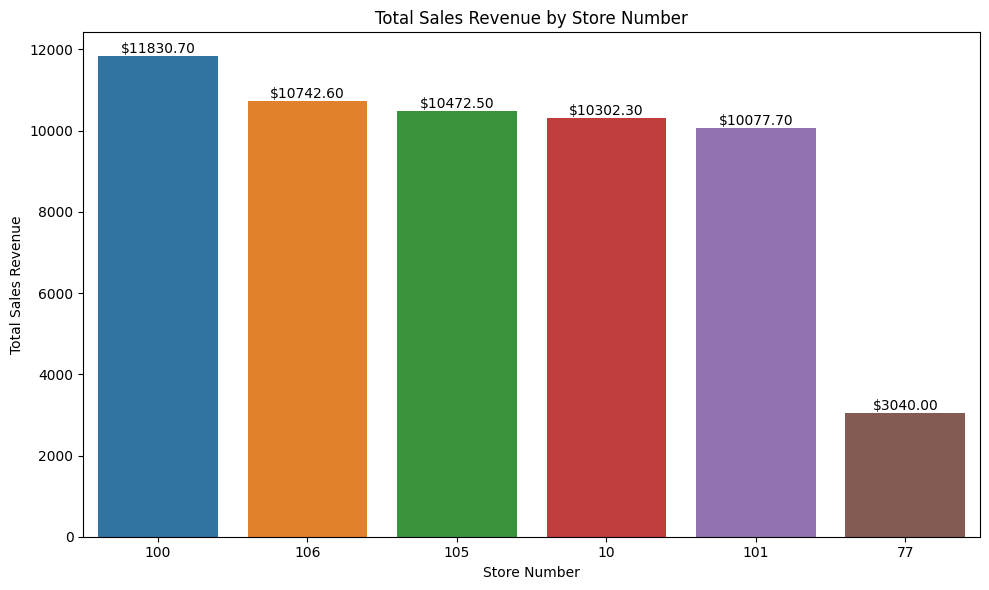

In [18]:
# visualize total sales revenue by store 77 and its control stores

# Select only the desired store numbers
desired_store_nbr = ['77', '100', '105', '106', '10', '101']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total sales revenue by store_nbr
sales_by_store_nbr = filtered_df.groupby('store_nbr')['tot_sales'].sum().sort_values(ascending=False)

# Plotting total sales by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_store_nbr.index, y=sales_by_store_nbr.values)
plt.xlabel('Store Number')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Store Number')

# Adding data labels
for i, sales in enumerate(sales_by_store_nbr):
    plt.text(i, sales, f"${sales:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Store 77 has the lowest total sales revenue. This means that the change effected on store 77 had a bad impact on its sales

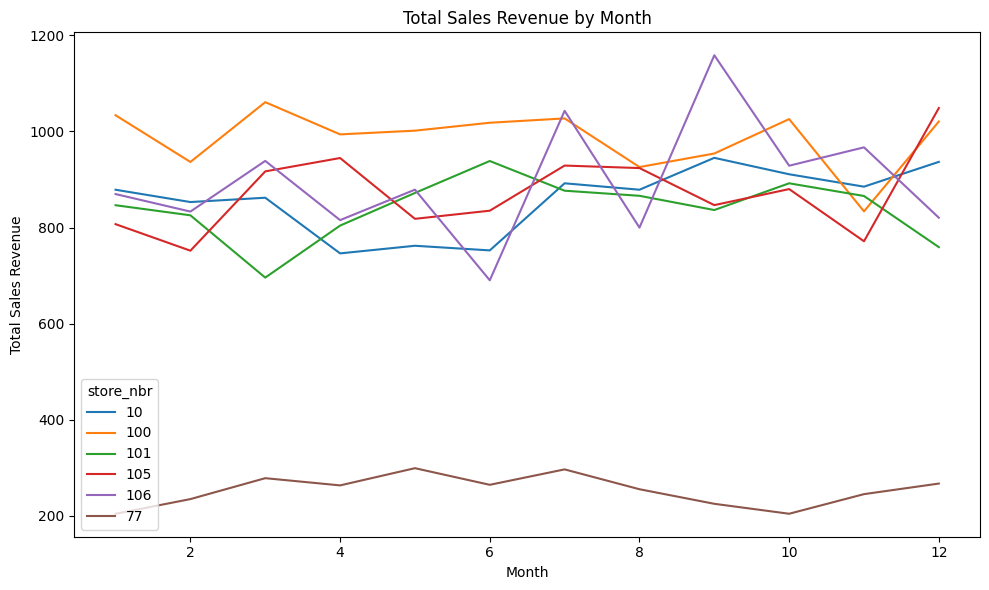

In [27]:
# Extract month from date
df['month'] = df['date'].dt.month

# Select only the desired store numbers
desired_store_nbr = ['77', '100', '105', '106', '10', '101']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Group by store_nbr and month, calculate total sales revenue
sales_by_store_month = filtered_df.groupby(['store_nbr', 'month'])['tot_sales'].sum().reset_index()

# Plotting total sales by month as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='tot_sales', hue='store_nbr', data=sales_by_store_month)
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Month')

plt.tight_layout()
plt.show()

#### The trial period wasn't specifically stated so we can't say exactly if the changes in the trial stores worked after the trial period. However, there was a growth in sales after a decline but this growth didn't get to the peak compared to the sales of other months

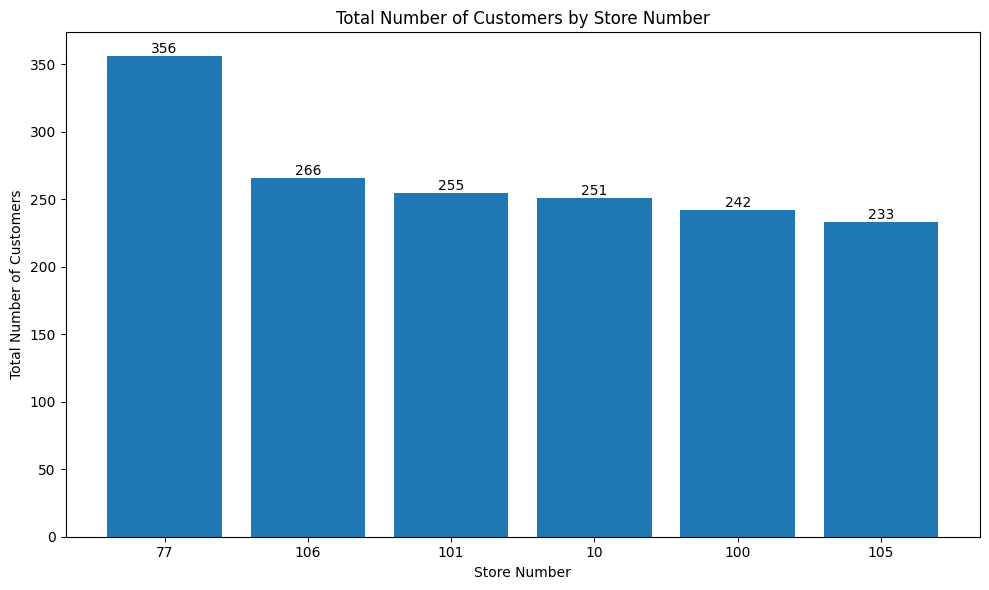

In [28]:
# visualize total number of customers by store 77 and its control stores

# Select only the desired store numbers
desired_store_nbr = ['77', '100', '105', '106', '10', '101']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total customers by store_nbr
customers_by_store_nbr = filtered_df.groupby('store_nbr')['loyalty_card_num'].nunique().sort_values(ascending=False)

# Plotting total customers by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(customers_by_store_nbr.index, customers_by_store_nbr.values)
plt.xlabel('Store Number')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Store Number')

# Adding data labels
for i, customers in enumerate(customers_by_store_nbr):
    plt.text(i, customers, str(customers), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### I used the loyalty card to get the unique number of customers in a store. Store 77 has the highest number of customers. Since the sales revenue was low but the customers are high. it means that the customers paid less compared to other stores or are not patronizing store 77 even after receiving their loyalty cards.  

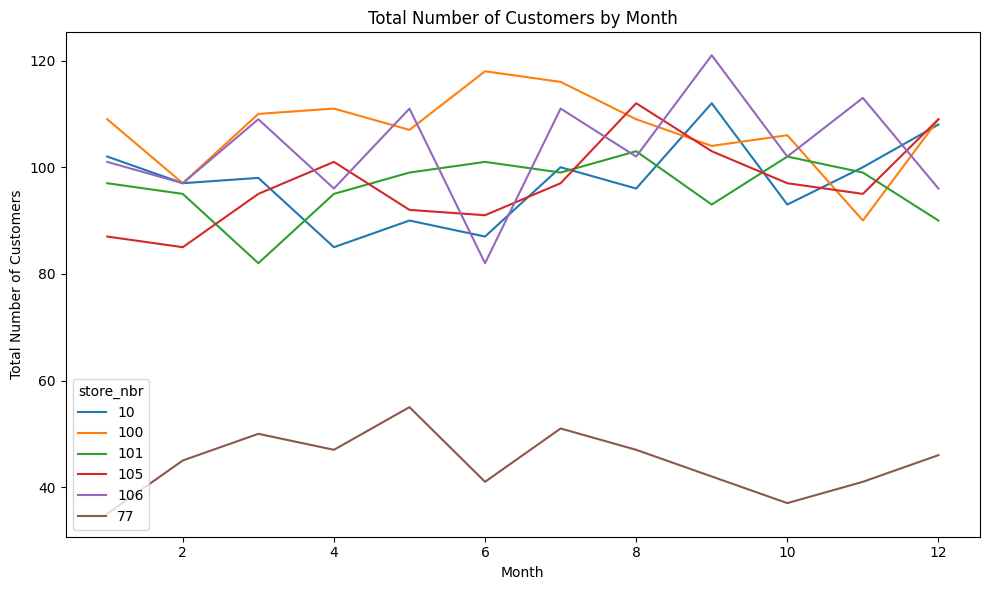

In [33]:
# Select only the desired store numbers
desired_store_nbr = ['77', '100', '105', '106', '10', '101']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total customers by store_nbr and month
customers_by_store_month = filtered_df.groupby(['store_nbr', 'month'])['loyalty_card_num'].nunique().reset_index()

# Plotting total customers by month as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='loyalty_card_num', hue='store_nbr', data=customers_by_store_month)
plt.xlabel('Month')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Month')

plt.tight_layout()
plt.show()

#### Just like the line chart of the sales, there was a decline in number of customers and then an increase towards the end of the year. But this increase didn't get to the peak

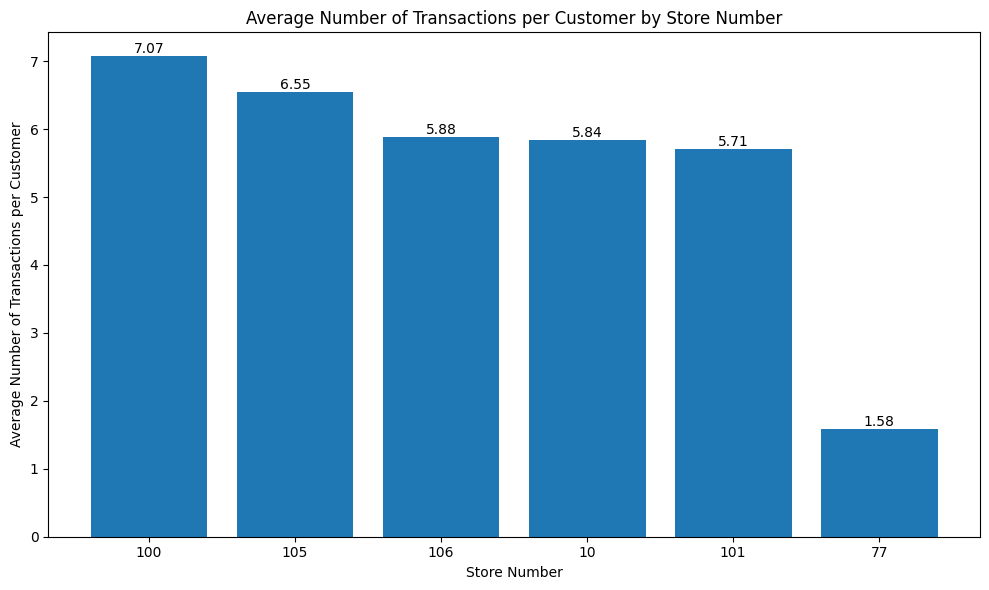

In [92]:
# visualize the average number of transactions per customer

# Select only the desired store numbers
desired_store_nbr = ['77', '100', '105', '106', '10', '101']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate average number of transactions per customer by store_nbr
transactions_per_customer = filtered_df.groupby('store_nbr').apply(lambda x: len(x) / x['loyalty_card_num'].nunique()).sort_values(ascending=False)

# Plotting average number of transactions per customer by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_customer.index, transactions_per_customer.values)
plt.xlabel('Store Number')
plt.ylabel('Average Number of Transactions per Customer')
plt.title('Average Number of Transactions per Customer by Store Number')

# Adding data labels
for i, avg_transactions in enumerate(transactions_per_customer):
    plt.text(i, avg_transactions, f"{avg_transactions:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### I took each loyalty card to be of a unique customer while doing this calcualation. It turns out that store 77 had the least number of transactions per customer. This is a confirmation that customers are either buying less or most customers are not buying at all. 

#### The low sales revenue in Store 77 is definitely from the low purchases of the customers because the customers were plenty but had the least purchases

## Store 86

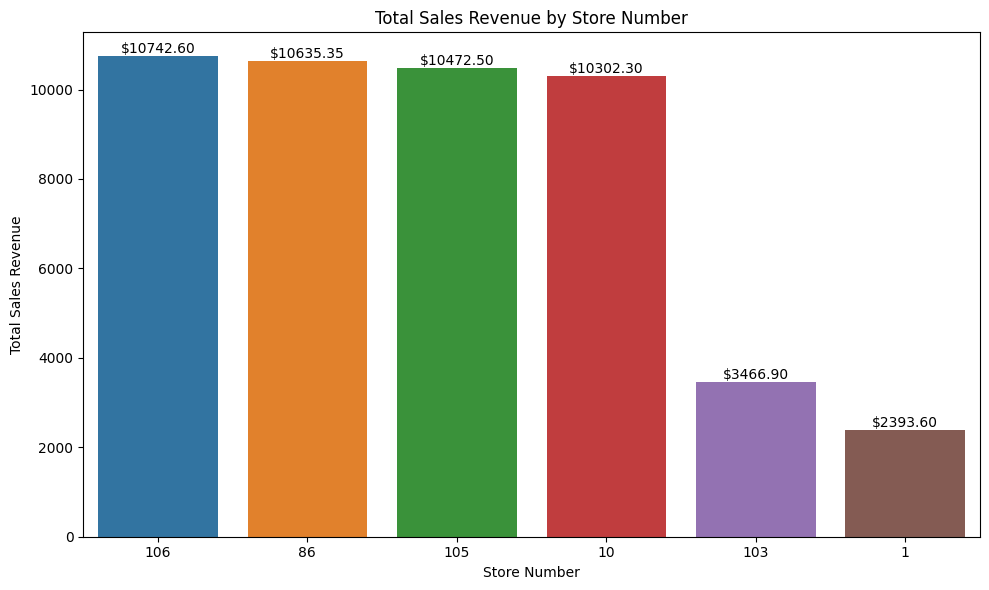

In [34]:
# visualize total sales revenue by store 86 and its control stores

# Select only the desired store numbers
desired_store_nbr = ['86', '1', '103', '106', '10', '105']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total sales revenue by store_nbr
sales_by_store_nbr = filtered_df.groupby('store_nbr')['tot_sales'].sum().sort_values(ascending=False)

# Plotting total sales by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_store_nbr.index, y=sales_by_store_nbr.values)
plt.xlabel('Store Number')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Store Number')

# Adding data labels
for i, sales in enumerate(sales_by_store_nbr):
    plt.text(i, sales, f"${sales:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Compared to other stores asides store 106, store 86 has the highest sales revenue. Whatever they changed probably worked effectively. 

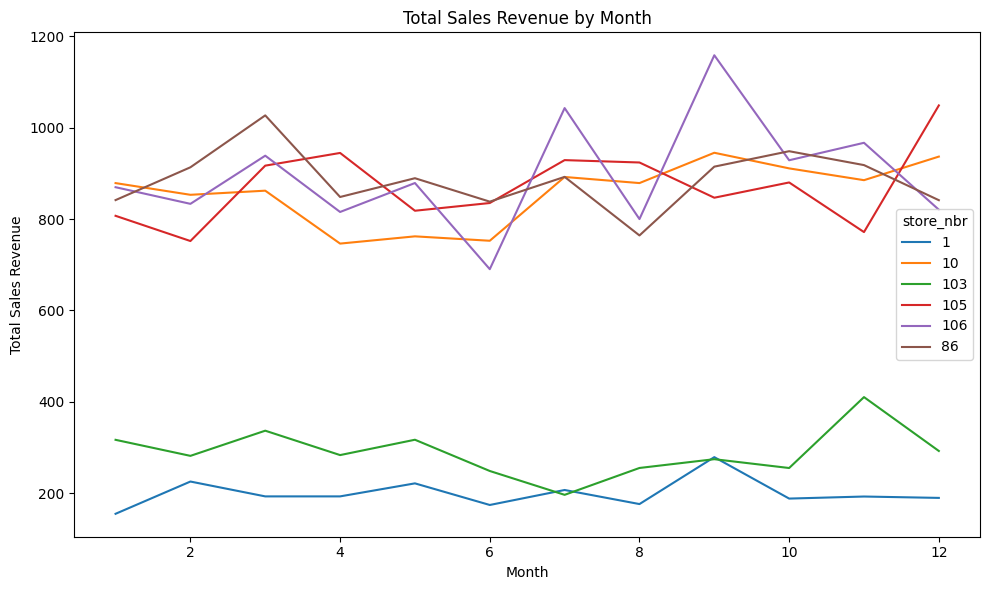

In [35]:
# Select only the desired store numbers
desired_store_nbr = ['86', '1', '103', '106', '10', '105']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Group by store_nbr and month, calculate total sales revenue
sales_by_store_month = filtered_df.groupby(['store_nbr', 'month'])['tot_sales'].sum().reset_index()

# Plotting total sales by month as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='tot_sales', hue='store_nbr', data=sales_by_store_month)
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Month')

plt.tight_layout()
plt.show()

#### From the beginning of the year, store 86 had the highest sales but as the year advanced towards the middle of the year, sales dipped. Even though it tried to recover towards the end of the year, store 105 and 10 still surpassed it in terms of revenue

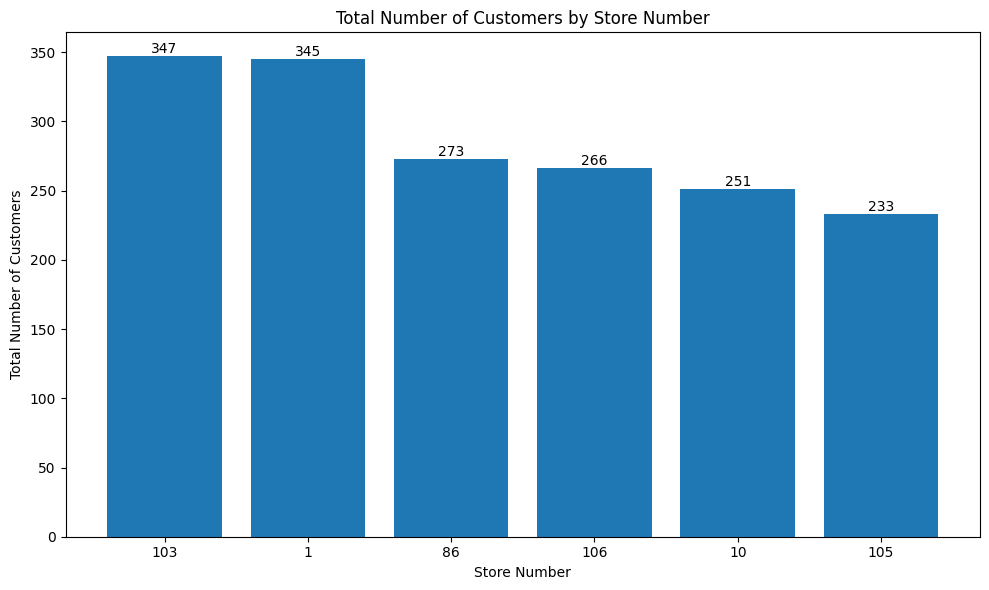

In [95]:
# visualize total number of customers by store 86 and its control stores

# Select only the desired store numbers
desired_store_nbr = ['86', '1', '103', '106', '10', '105']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total customers by store_nbr
customers_by_store_nbr = filtered_df.groupby('store_nbr')['loyalty_card_num'].nunique().sort_values(ascending=False)

# Plotting total customers by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(customers_by_store_nbr.index, customers_by_store_nbr.values)
plt.xlabel('Store Number')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Store Number')

# Adding data labels
for i, customers in enumerate(customers_by_store_nbr):
    plt.text(i, customers, str(customers), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Store 86 had an average number of customers compared to the control stores. We can't judge if the change effected in store 86 was good enough or not because we can't see the progression by time

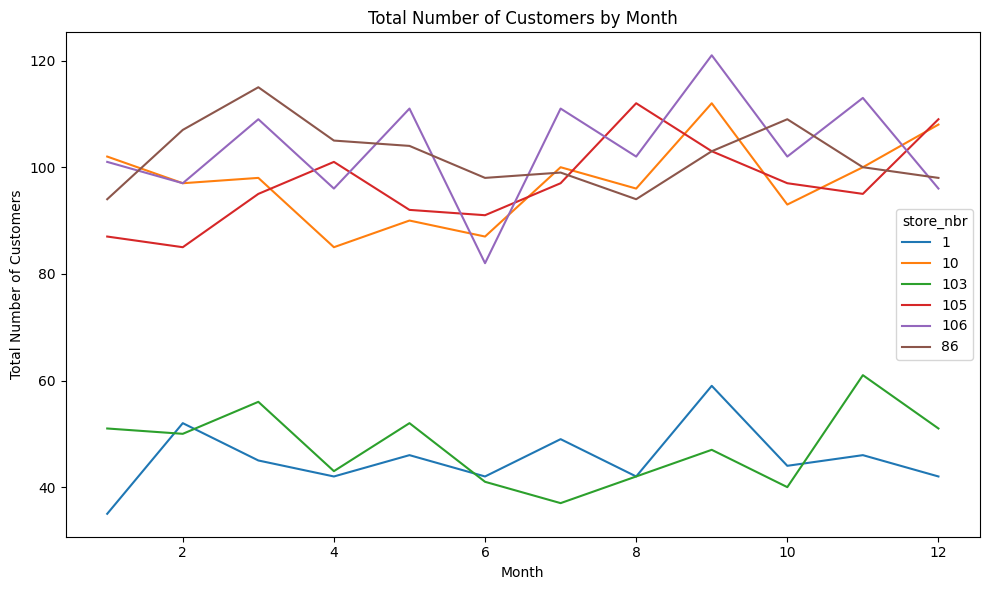

In [36]:
# Select only the desired store numbers
desired_store_nbr = ['86', '1', '103', '106', '10', '105']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total customers by store_nbr and month
customers_by_store_month = filtered_df.groupby(['store_nbr', 'month'])['loyalty_card_num'].nunique().reset_index()

# Plotting total customers by month as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='loyalty_card_num', hue='store_nbr', data=customers_by_store_month)
plt.xlabel('Month')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Month')

plt.tight_layout()
plt.show()

#### This is very similar to the line chart of sales revenue

#### From the beginning of the year, store 86 had the highest number of customers but as the year advanced towards the middle of the year, customers began to churn. Even though it tried to recover towards the end of the year, store 105 and 10 still had more customers

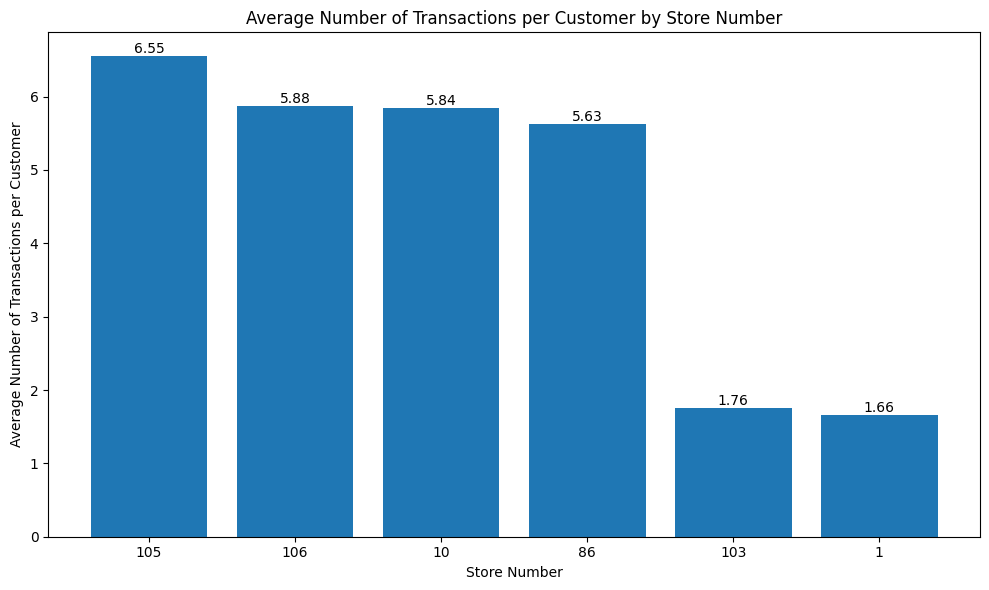

In [37]:
# visualize the average number of transactions per customer

# Select only the desired store numbers
desired_store_nbr = ['86', '1', '103', '106', '10', '105']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate average number of transactions per customer by store_nbr
transactions_per_customer = filtered_df.groupby('store_nbr').apply(lambda x: len(x) / x['loyalty_card_num'].nunique()).sort_values(ascending=False)

# Plotting average number of transactions per customer by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_customer.index, transactions_per_customer.values)
plt.xlabel('Store Number')
plt.ylabel('Average Number of Transactions per Customer')
plt.title('Average Number of Transactions per Customer by Store Number')

# Adding data labels
for i, avg_transactions in enumerate(transactions_per_customer):
    plt.text(i, avg_transactions, f"{avg_transactions:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Store 86 is near the lower end compared to the control stores in regards to the average number of transactions per customer. Compared to the total number of customers, it has a lower position. This could mean that many customers are buying less

#### The high sales revenue of store 86 could be a contribution from both the number of customers and the number of purchases because they both have moderate numbers and a combination of these moderate numbers birthed a somewhat high number


## Store 88

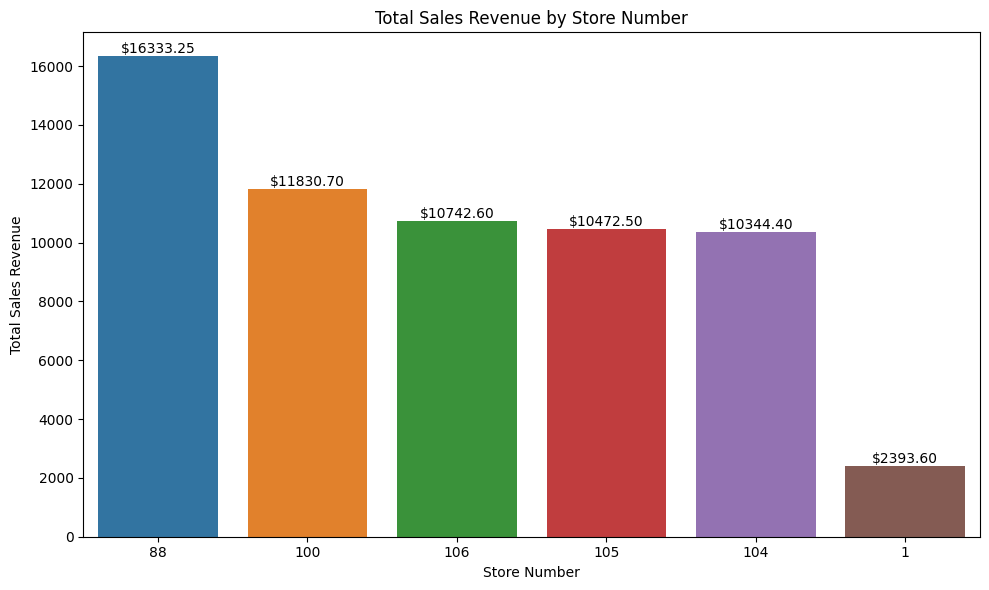

In [38]:
# visualize total sales revenue by store 88 and its control stores

# Select only the desired store numbers
desired_store_nbr = ['88', '1', '105', '100', '106', '104']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total sales revenue by store_nbr
sales_by_store_nbr = filtered_df.groupby('store_nbr')['tot_sales'].sum().sort_values(ascending=False)

# Plotting total sales by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_store_nbr.index, y=sales_by_store_nbr.values)
plt.xlabel('Store Number')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Store Number')

# Adding data labels
for i, sales in enumerate(sales_by_store_nbr):
    plt.text(i, sales, f"${sales:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Store 88 made the highest sales revenue compared to the other control stores. Whatever action was carried on it worked really well in regards to increasing revenue

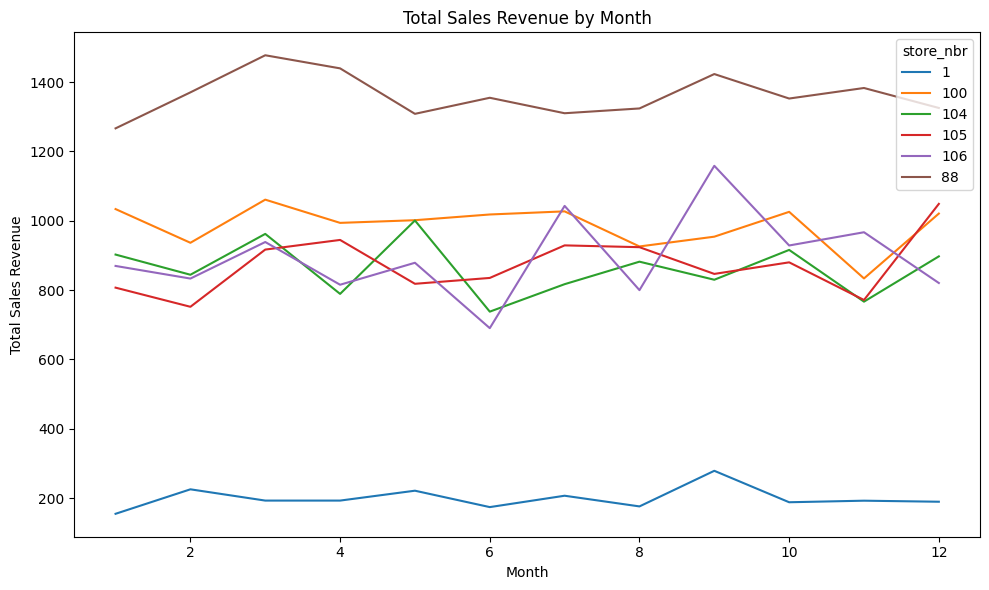

In [39]:
# Select only the desired store numbers
desired_store_nbr = ['88', '1', '105', '100', '106', '104']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Group by store_nbr and month, calculate total sales revenue
sales_by_store_month = filtered_df.groupby(['store_nbr', 'month'])['tot_sales'].sum().reset_index()

# Plotting total sales by month as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='tot_sales', hue='store_nbr', data=sales_by_store_month)
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Month')

plt.tight_layout()
plt.show()

#### Store 88 stayed at the top throughout the year

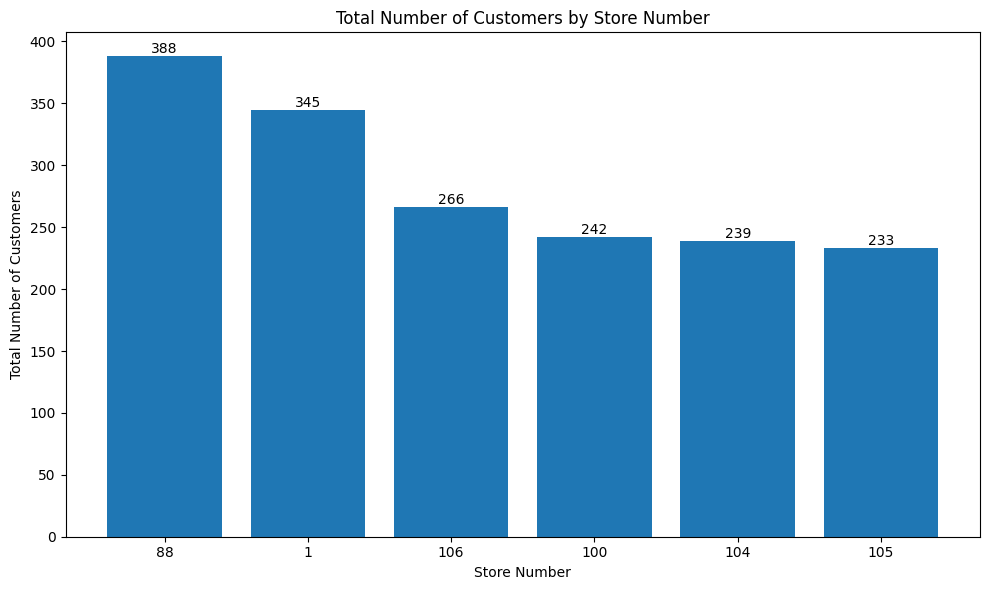

In [40]:
# visualize total number of customers by store 86 and its control stores

# Select only the desired store numbers
desired_store_nbr = ['88', '1', '105', '100', '106', '104']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total customers by store_nbr
customers_by_store_nbr = filtered_df.groupby('store_nbr')['loyalty_card_num'].nunique().sort_values(ascending=False)

# Plotting total customers by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(customers_by_store_nbr.index, customers_by_store_nbr.values)
plt.xlabel('Store Number')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Store Number')

# Adding data labels
for i, customers in enumerate(customers_by_store_nbr):
    plt.text(i, customers, str(customers), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Wow! It also had the highest number of customers. I'm guessing there was an implementation of discount sales in store 88. Let's see what the average number of transactions per customer can tell us

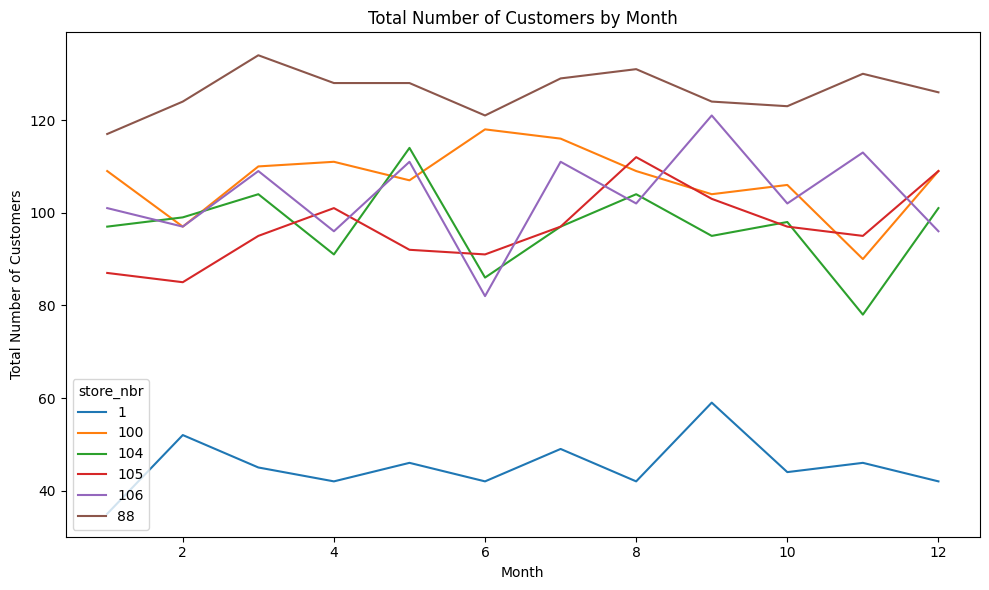

In [41]:
# Select only the desired store numbers
desired_store_nbr = ['88', '1', '105', '100', '106', '104']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate total customers by store_nbr and month
customers_by_store_month = filtered_df.groupby(['store_nbr', 'month'])['loyalty_card_num'].nunique().reset_index()

# Plotting total customers by month as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='loyalty_card_num', hue='store_nbr', data=customers_by_store_month)
plt.xlabel('Month')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Month')

plt.tight_layout()
plt.show()

#### Store 88 still stayed at the top througout the year in terms of number of customers

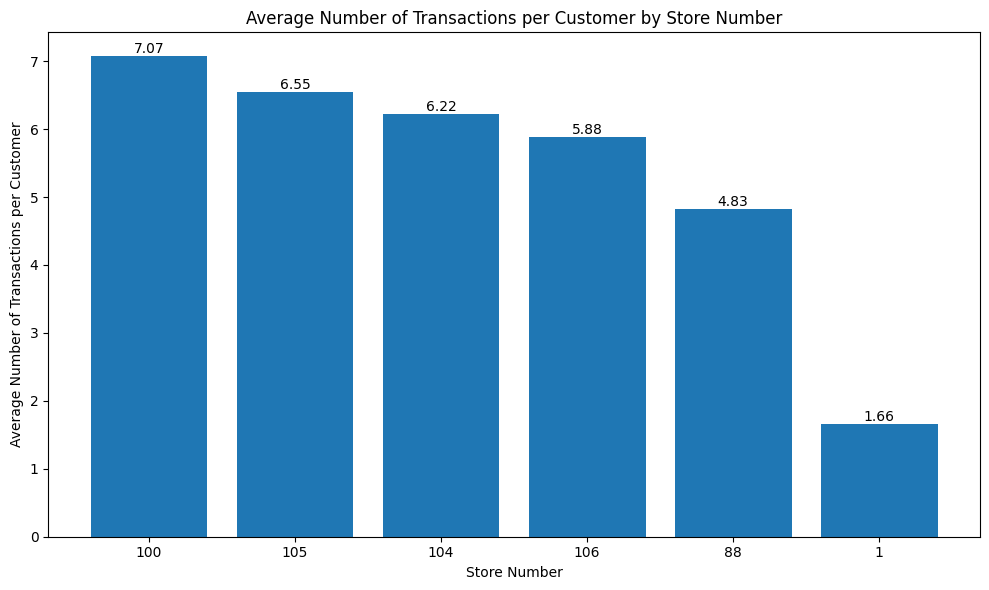

In [43]:
# visualize the average number of transactions per customer

# Select only the desired store numbers
desired_store_nbr = ['88', '1', '105', '100', '106', '104']
filtered_df = df[df['store_nbr'].isin(desired_store_nbr)]

# Calculate average number of transactions per customer by store_nbr
transactions_per_customer = filtered_df.groupby('store_nbr').apply(lambda x: len(x) / x['loyalty_card_num'].nunique()).sort_values(ascending=False)

# Plotting average number of transactions per customer by store_nbr as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_customer.index, transactions_per_customer.values)
plt.xlabel('Store Number')
plt.ylabel('Average Number of Transactions per Customer')
plt.title('Average Number of Transactions per Customer by Store Number')

# Adding data labels
for i, avg_transactions in enumerate(transactions_per_customer):
    plt.text(i, avg_transactions, f"{avg_transactions:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### The total number of transactions was low. This could either be a fault of the company or the customer. It could be the fault of the company if a discount sales was announced but they didn't prepare for it by stocking the store. It could also be caused by the customer where they couldn't afford some of the things in the store even after the hypothesized discount sales. This doesn't rule out the fact that store 88 is the best performing compared to store 77 and store 86

#### The high sales revenue of store 88 is due to high purchasing customers

## Conclusion

- In the trial period, store 88 made the most revenue compared to its control stores due to the high number of customers

- In the trial period, store 86 made an average sales revenue compared to the control stores due to a cummulative effort of the number of purchasing customers and the number of their purchases which were both on moderate levels. 

- In the trial period, store 77 made the least sales revenue compared to the control stores due to the least number of purchases made by customers

## Recommendations

- Since some control stores were repetitive across the trial stores, whatever strategy that was implemented in store 88 should be implemented in store 86 and store 77 while monitoring the metrics for improvement. 